# Importing Dataset and Pandas

In [1]:
import pandas as pd
health_data = pd.read_csv("F:\Projects\Health Monitoring and Analysis using Python\healthmonitoring.csv")
health_data.head()

,PatientID,Age,Gender,HeartRate,BloodPressure,RespiratoryRate,BodyTemperature,ActivityLevel,OxygenSaturation,SleepQuality,StressLevel,Timestamp
0,1,69,Male,60.993428,130/85,15,98.885236,resting,95.0,excellent,low,2024-04-26 17:28:55.286711
1,2,32,Male,98.723471,120/80,23,98.281883,walking,97.0,good,high,2024-04-26 17:23:55.286722
2,3,78,Female,82.295377,130/85,13,98.820286,resting,98.0,fair,high,2024-04-26 17:18:55.286726
3,4,38,Female,80.000000,111/78,19,98.412594,running,98.0,poor,moderate,2024-04-26 17:13:55.286728
4,5,41,Male,87.531693,120/80,14,99.369871,resting,98.0,good,low,2024-04-26 17:08:55.286731


# Checking dimensions of dataset

In [2]:
health_data.shape

(500, 12)

# Detecting Null Values

In [3]:
health_data.isnull().sum()

PatientID             0
Age                   0
Gender                0
HeartRate             0
BloodPressure         0
RespiratoryRate       0
BodyTemperature      18
ActivityLevel         0
OxygenSaturation    163
SleepQuality          0
StressLevel           0
Timestamp             0
dtype: int64

# Filling missing values with median values

In [4]:
# Calculating medians
median_body_temp = health_data['BodyTemperature'].median()
median__osygen_sat = health_data['OxygenSaturation'].median()

# Filling missing values
health_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
health_data['OxygenSaturation'].fillna(median__osygen_sat, inplace=True)

C:\Users\Muhammad Zorain\AppData\Local\Temp\ipykernel_6568\4276031676.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  health_data['BodyTemperature'].fillna(median_body_temp, inplace=True)
C:\Users\Muhammad Zorain\AppData\Local\Temp\ipykernel_6568\4276031676.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

# Examining Summary Statistics

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [7]:
# Summary Statistics
summary_stats = health_data.describe()
print(summary_stats)

        PatientID         Age   HeartRate  RespiratoryRate  BodyTemperature  \
count  500.000000  500.000000  500.000000       500.000000       500.000000   
mean   250.500000   51.146000   80.131613        17.524000        98.584383   
std    144.481833   19.821566    9.606273         3.382352         0.461502   
min      1.000000   18.000000   60.169259        12.000000        97.094895   
25%    125.750000   34.000000   75.000000        15.000000        98.281793   
50%    250.500000   51.000000   80.000000        17.500000        98.609167   
75%    375.250000   69.000000   86.276413        20.000000        98.930497   
max    500.000000   84.000000   99.925508        23.000000        99.489150   

       OxygenSaturation  
count        500.000000  
mean          96.296000  
std            1.408671  
min           94.000000  
25%           96.000000  
50%           96.000000  
75%           97.000000  
max           99.000000  


# Plotting distributions of numerical features

c:\Users\Muhammad Zorain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Muhammad Zorain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Muhammad Zorain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Muhammad Zorain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

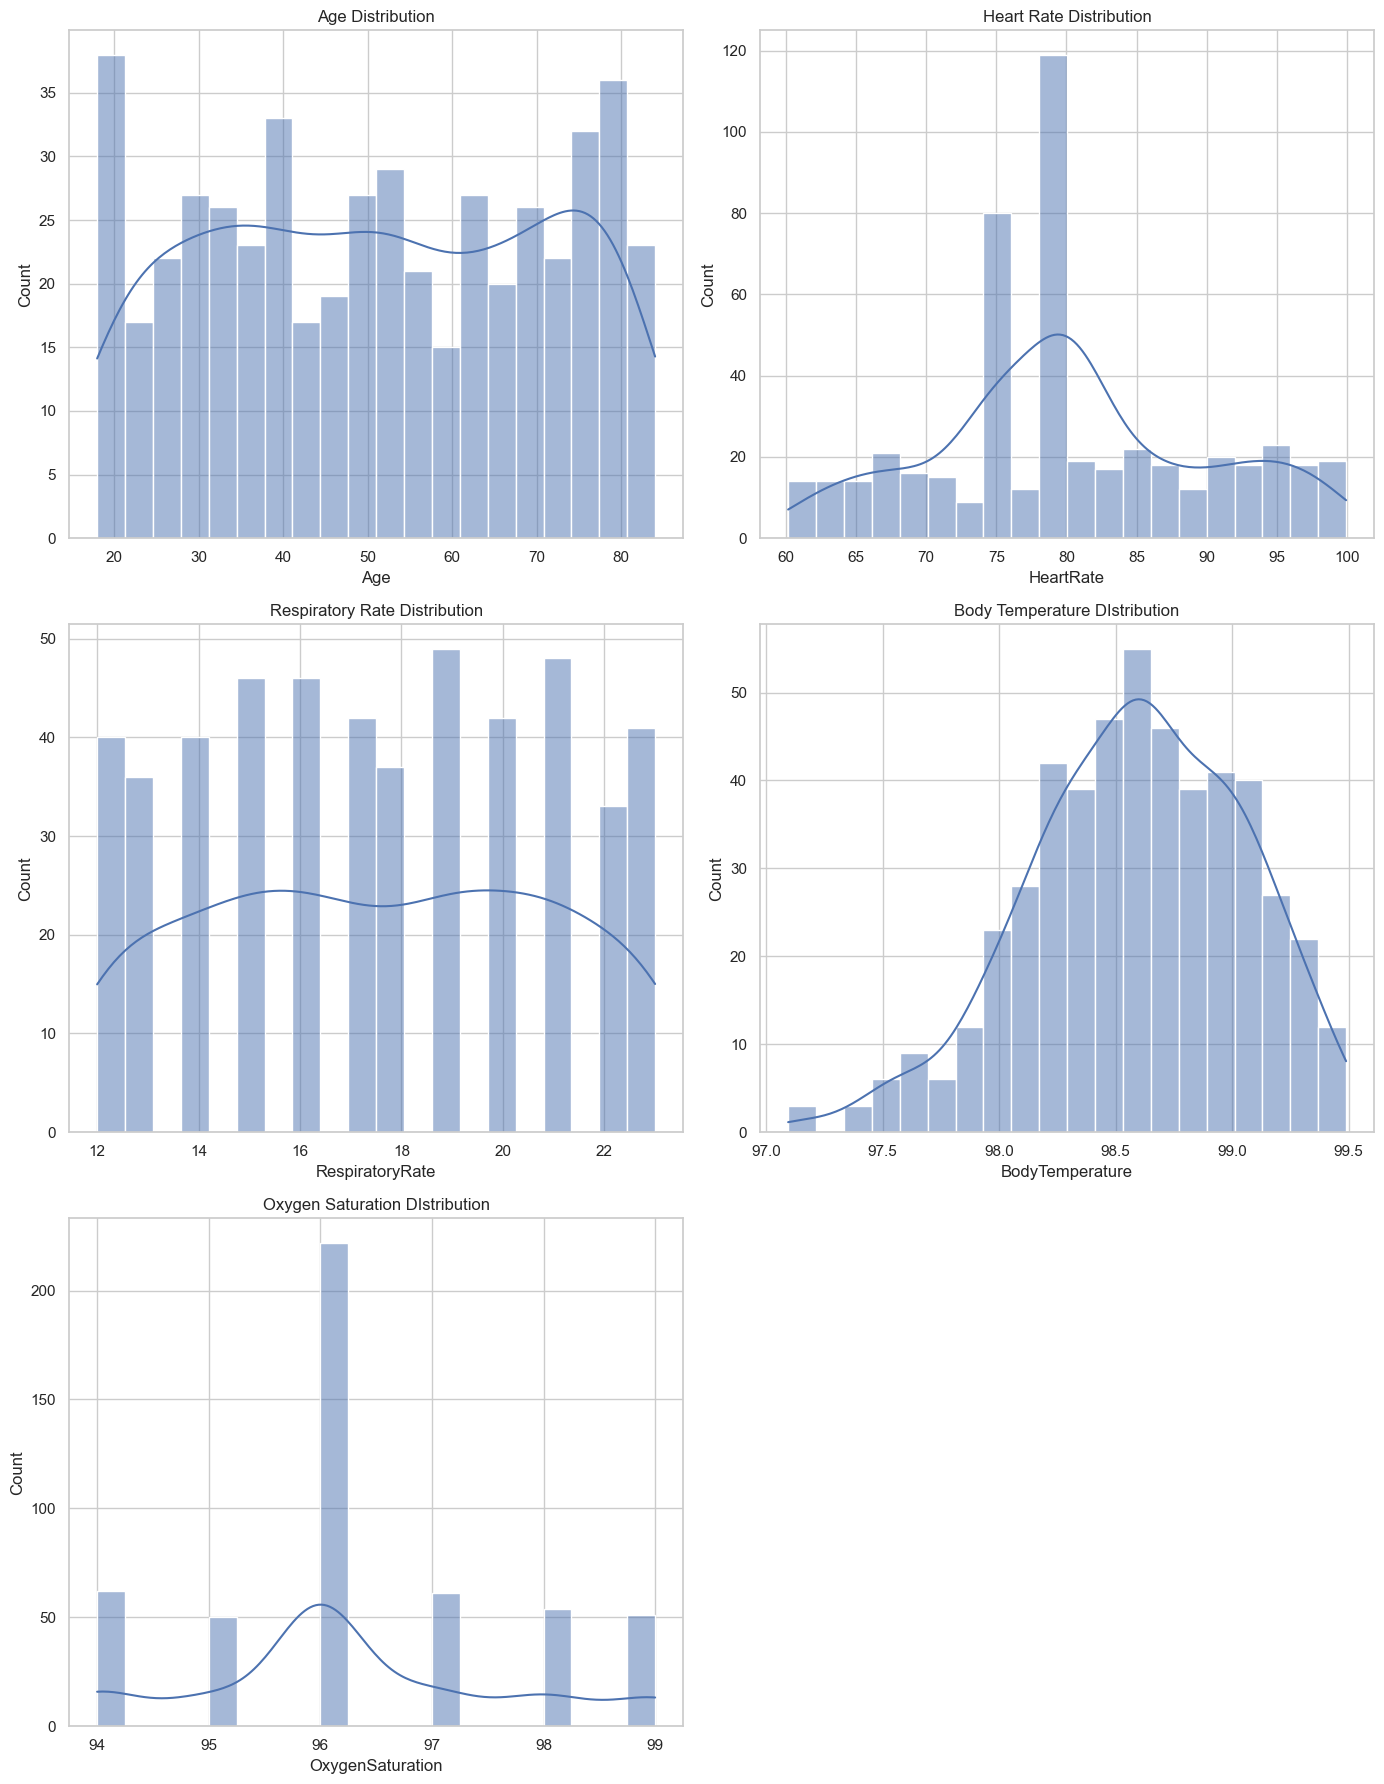

In [12]:
fig, axes = plt.subplots(3,2, figsize=(14,18))
sns.histplot(health_data['Age'], bins=20, kde=True, ax=axes[0,0])
axes[0,0].set_title('Age Distribution')

sns.histplot(health_data['HeartRate'], bins=20, kde=True, ax=axes[0,1])
axes[0,1].set_title('Heart Rate Distribution')

sns.histplot(health_data['RespiratoryRate'], bins=20, kde=True, ax=axes[1,0])
axes[1,0].set_title('Respiratory Rate Distribution')

sns.histplot(health_data['BodyTemperature'], bins=20, kde=True, ax=axes[1,1])
axes[1,1].set_title('Body Temperature DIstribution')

sns.histplot(health_data['OxygenSaturation'], bins=20, kde=True, ax=axes[2,0])
axes[2,0].set_title('Oxygen Saturation DIstribution')

fig.delaxes(axes[2,1])  # removing unused subplots

plt.tight_layout()
plt.show()

# Analyzing Gender Distribution 

In [13]:
gender_counts = health_data['Gender'].value_counts()
print(gender_counts)

Gender
Male      256
Female    244
Name: count, dtype: int64


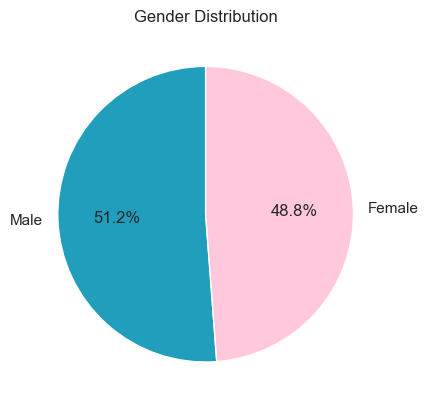

In [19]:
# Plotting the Gender Distribution
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#219EBC','#FFC8DD'])
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

# Analyzing Correlation between health metrics 

In [28]:
correlation_matrix = health_data[['Age', 'HeartRate' , 'RespiratoryRate' , 'BodyTemperature' , 'OxygenSaturation']].corr()

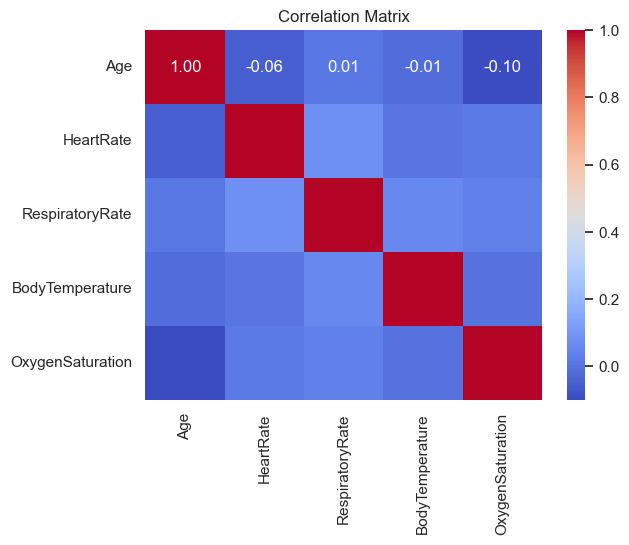

In [34]:
# Creating the correlation matrix plot
sns.heatmap( correlation_matrix , annot=True , fmt='.2f' , cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Analyzing Heart Rate by Activity Level

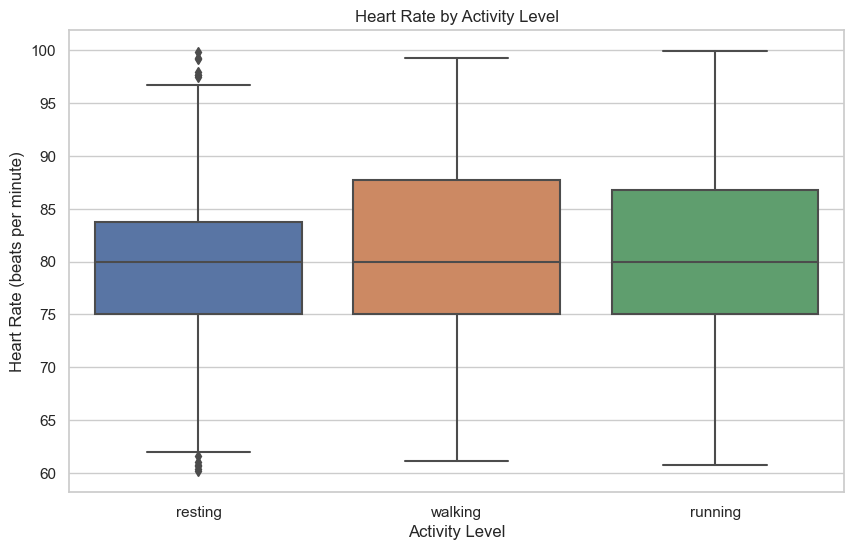

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='ActivityLevel', y='HeartRate', data=health_data)
plt.title('Heart Rate by Activity Level')
plt.ylabel('Heart Rate (beats per minute)')
plt.xlabel('Activity Level')
plt.show()

# Analyzing Blood Pressure distribution

In [37]:
# Extracting systolic & diastolic blood pressure for analysis
health_data[['SystolicBP','DiastolicBP']] = health_data['BloodPressure'].str.split('/', expand=True).astype(int)

c:\Users\Muhammad Zorain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Muhammad Zorain\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


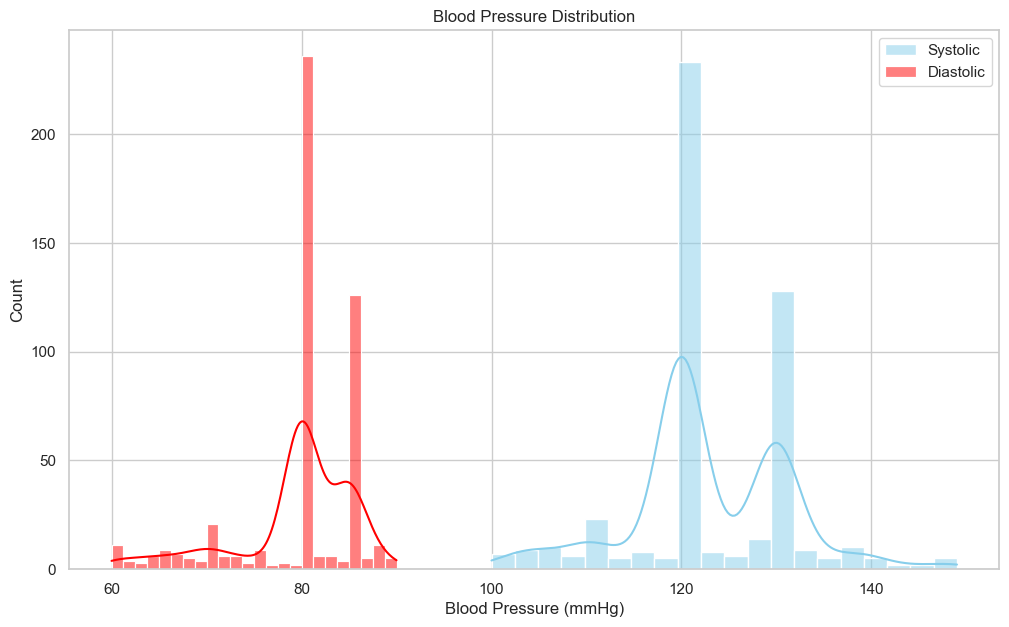

In [40]:
# Plotting Blood Pressure distribution
plt.figure(figsize=(12,7))
sns.histplot(health_data['SystolicBP'], color="skyblue", label='Systolic', kde=True)
sns.histplot(health_data['DiastolicBP'], color="red", label='Diastolic', kde=True)
plt.title('Blood Pressure Distribution')
plt.xlabel('Blood Pressure (mmHg)')
plt.legend()
plt.show()

# Analyzing Health Metrics by Gender

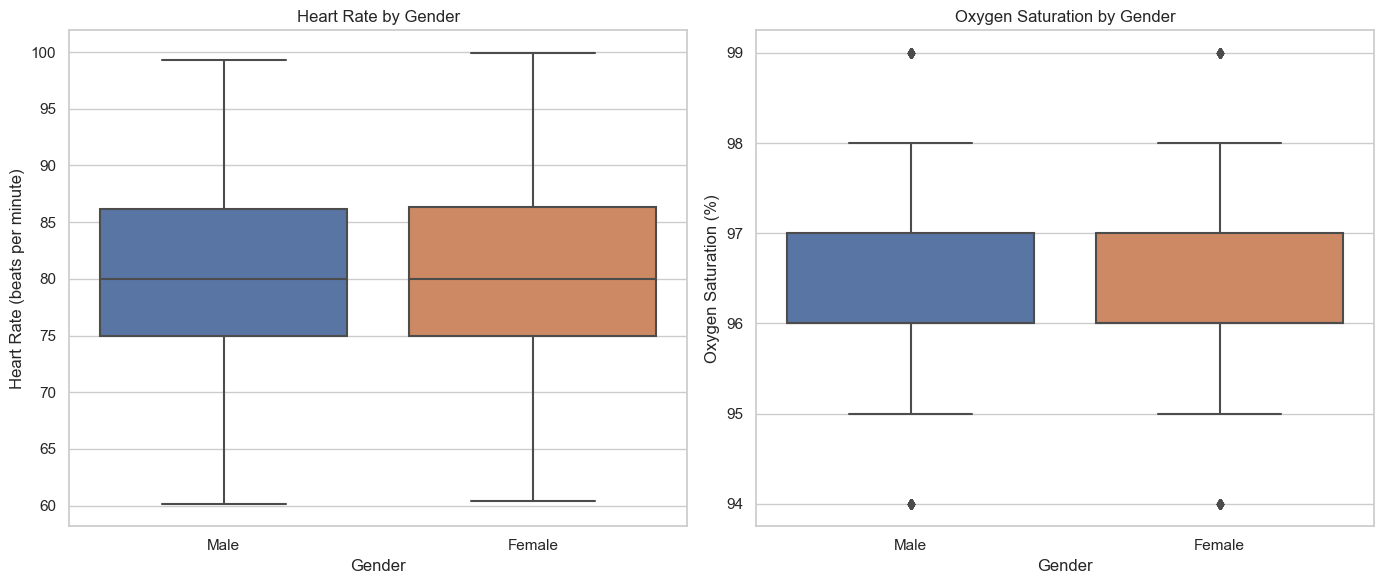

In [41]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.boxplot(x='Gender', y='HeartRate', data=health_data, ax=axes[0])
axes[0].set_title('Heart Rate by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Heart Rate (beats per minute)')

sns.boxplot(x='Gender', y='OxygenSaturation', data=health_data, ax=axes[1])
axes[1].set_title('Oxygen Saturation by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Oxygen Saturation (%)')

plt.tight_layout()
plt.show()

# Analyzing Health Metrics by Sleep Quality & Stress Level

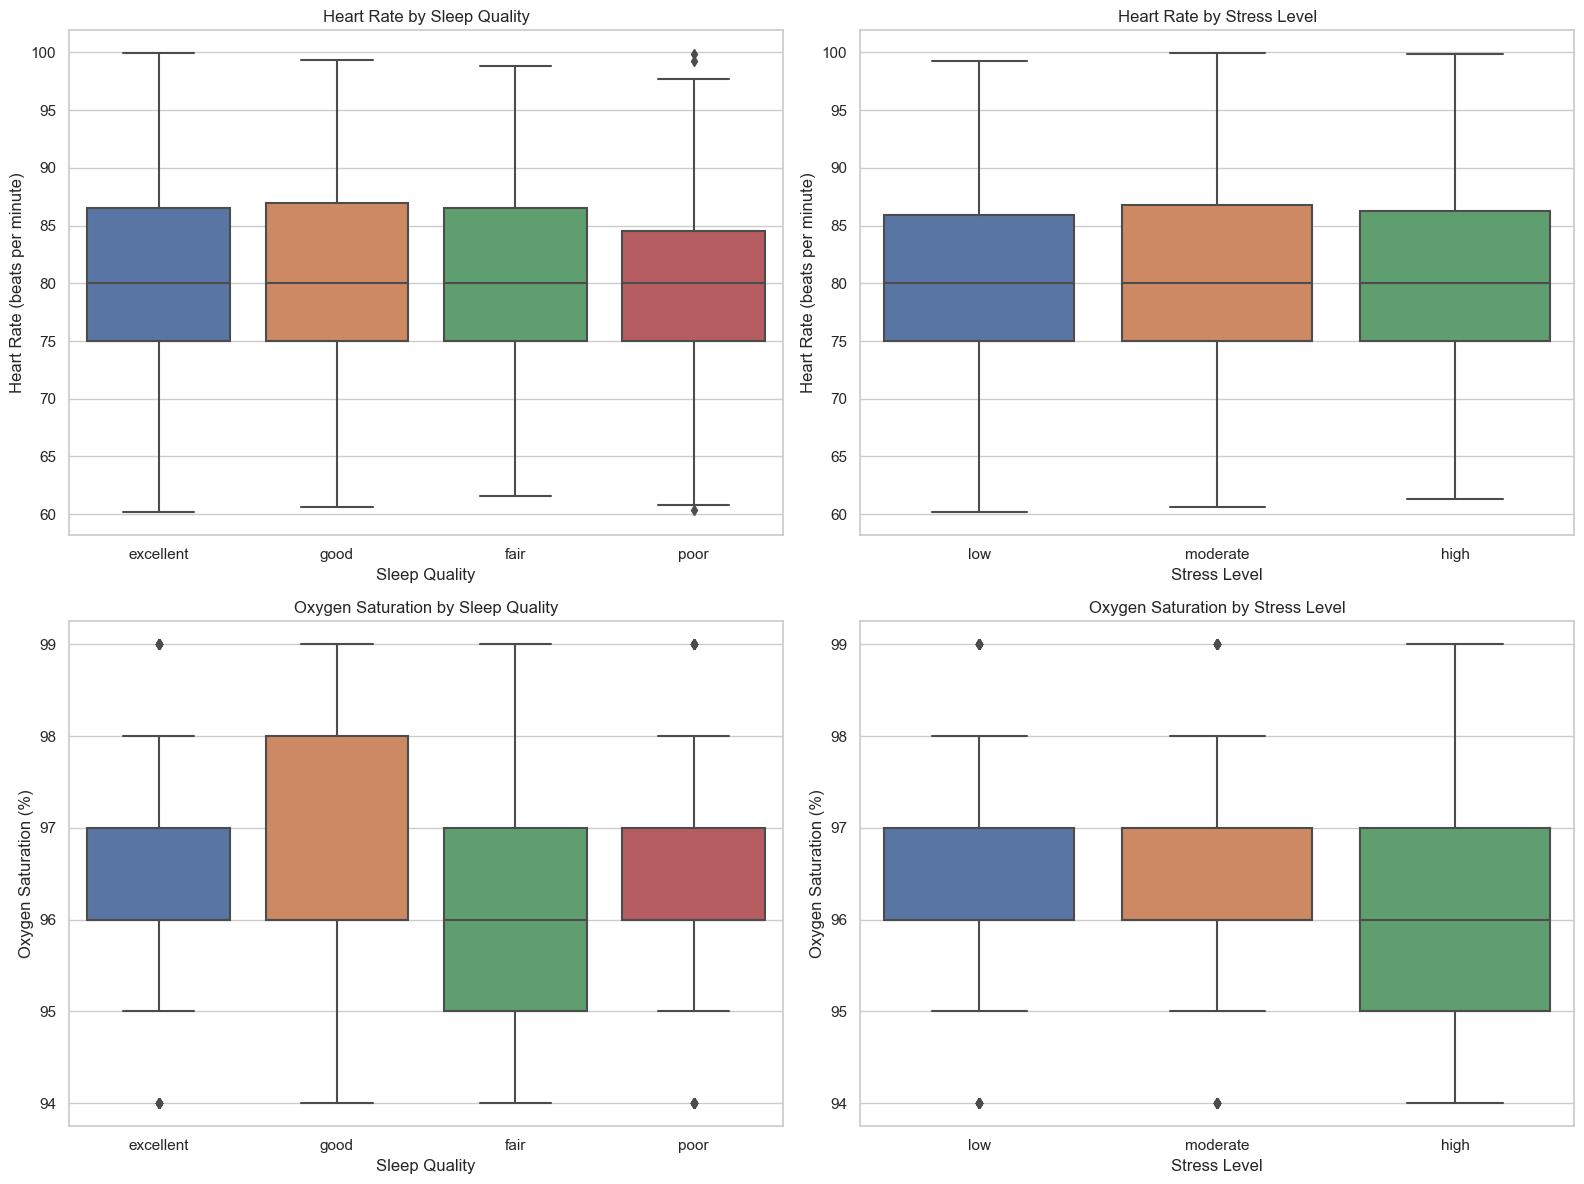

In [45]:
# Categorizing sleep quality 
sleep_quality_order = ['excellent','good','fair','poor']
stress_level_order = ['low','moderate','high']

# Creating plots to examine relationships
fig, axes = plt.subplots(2,2, figsize=(16,12))

# Analyzing Heart Rate by Sleep Quality and Stress Level
sns.boxplot(x='SleepQuality', y='HeartRate', data=health_data, order=sleep_quality_order, ax=axes[0,0])
axes[0,0].set_title('Heart Rate by Sleep Quality')
axes[0,0].set_ylabel('Heart Rate (beats per minute)')
axes[0,0].set_xlabel('Sleep Quality')

sns.boxplot(x='StressLevel', y='HeartRate', data=health_data, order=stress_level_order, ax=axes[0,1])
axes[0,1].set_title('Heart Rate by Stress Level')
axes[0,1].set_ylabel('Heart Rate (beats per minute)')
axes[0,1].set_xlabel('Stress Level')

# Analyzing Oxygen Saturation by Sleep Quality and Stress Level
sns.boxplot(x='SleepQuality', y='OxygenSaturation', data=health_data, order=sleep_quality_order, ax=axes[1,0])
axes[1,0].set_title('Oxygen Saturation by Sleep Quality')
axes[1,0].set_ylabel('Oxygen Saturation (%)')
axes[1,0].set_xlabel('Sleep Quality')

sns.boxplot(x='StressLevel', y='OxygenSaturation', data=health_data, order=stress_level_order, ax=axes[1,1])
axes[1,1].set_title('Oxygen Saturation by Stress Level')
axes[1,1].set_ylabel('Oxygen Saturation (%)')
axes[1,1].set_xlabel('Stress Level')

plt.tight_layout()
plt.show()

# Analyzing Respiratory Rate and Body Temperature by Activity Levels

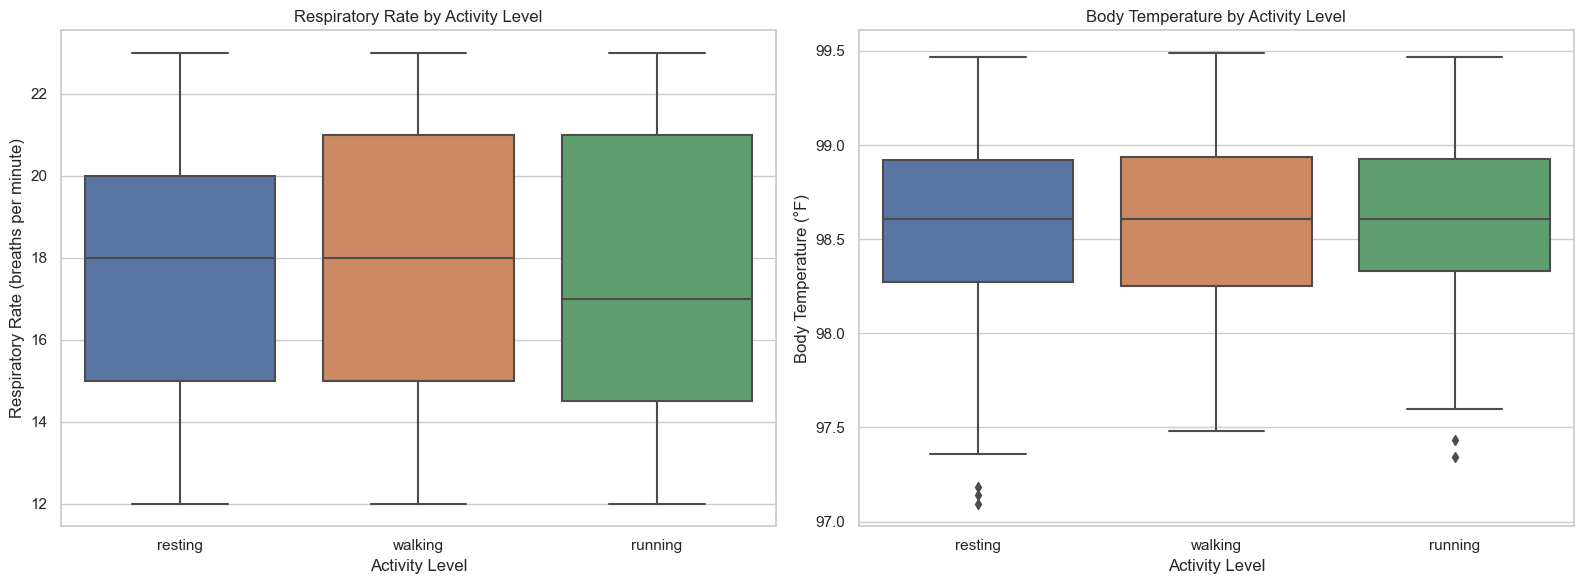

In [46]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

# Respiratory Rate by Activity Level
sns.boxplot(x='ActivityLevel', y='RespiratoryRate', data=health_data, ax=axes[0])
axes[0].set_title('Respiratory Rate by Activity Level')
axes[0].set_ylabel('Respiratory Rate (breaths per minute)')
axes[0].set_xlabel('Activity Level')

# Body Temperature by Activity Level
sns.boxplot(x='ActivityLevel', y='BodyTemperature', data=health_data, ax=axes[1])
axes[1].set_title('Body Temperature by Activity Level')
axes[1].set_ylabel('Body Temperature (°F)')
axes[1].set_xlabel('Activity Level')

plt.tight_layout()
plt.show()

# Grouping patients

In [47]:
# function to categorize Age
def age_grp(age):
    if age<=35:
        return 'Young'
    elif age <= 55:
        return 'Middle-aged'
    else:
        return 'Senior'
    
# function to categorize Blood Pressure
def BP_grp(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return 'Normal'
    elif 120 <= systolic < 140 and 80 <= diastolic < 90:
        return 'Elevated'
    elif 140 <= systolic < 160 and 90 <= diastolic < 100:
        return 'Hypertension Stage 1'
    else:
        return 'Hypertension Stage 2'
   
# function to categorize Heart Rate
def hr_grp(hr):
    if hr < 60:
        return 'Low'
    elif hr <= 100:
        return 'Normal'
    else:
        return 'High'  

# function to categorize Oxygen Saturation
def os_grp(os):
    if os < 94:
        return 'Low'
    else:
        return 'Normal'
    
# Apllying categories
health_data['AgeGroup'] = health_data['Age'].apply(age_grp)
health_data['BPCategory'] = health_data.apply(lambda x: BP_grp(x['SystolicBP'], x['DiastolicBP']), axis=1)
health_data['HeartRateCategory'] = health_data['HeartRate'].apply(hr_grp)
health_data['OxygenSaturationCategory'] = health_data['OxygenSaturation'].apply(os_grp)

In [49]:
health_data[['Age', 'AgeGroup', 'BloodPressure','BPCategory','HeartRate','HeartRateCategory','OxygenSaturation','OxygenSaturationCategory']].head()

,Age,AgeGroup,BloodPressure,BPCategory,HeartRate,HeartRateCategory,OxygenSaturation,OxygenSaturationCategory
0,69,Senior,130/85,Elevated,60.993428,Normal,95.0,Normal
1,32,Young,120/80,Elevated,98.723471,Normal,97.0,Normal
2,78,Senior,130/85,Elevated,82.295377,Normal,98.0,Normal
3,38,Middle-aged,111/78,Normal,80.000000,Normal,98.0,Normal
4,41,Middle-aged,120/80,Elevated,87.531693,Normal,98.0,Normal


# Visualizing Groups

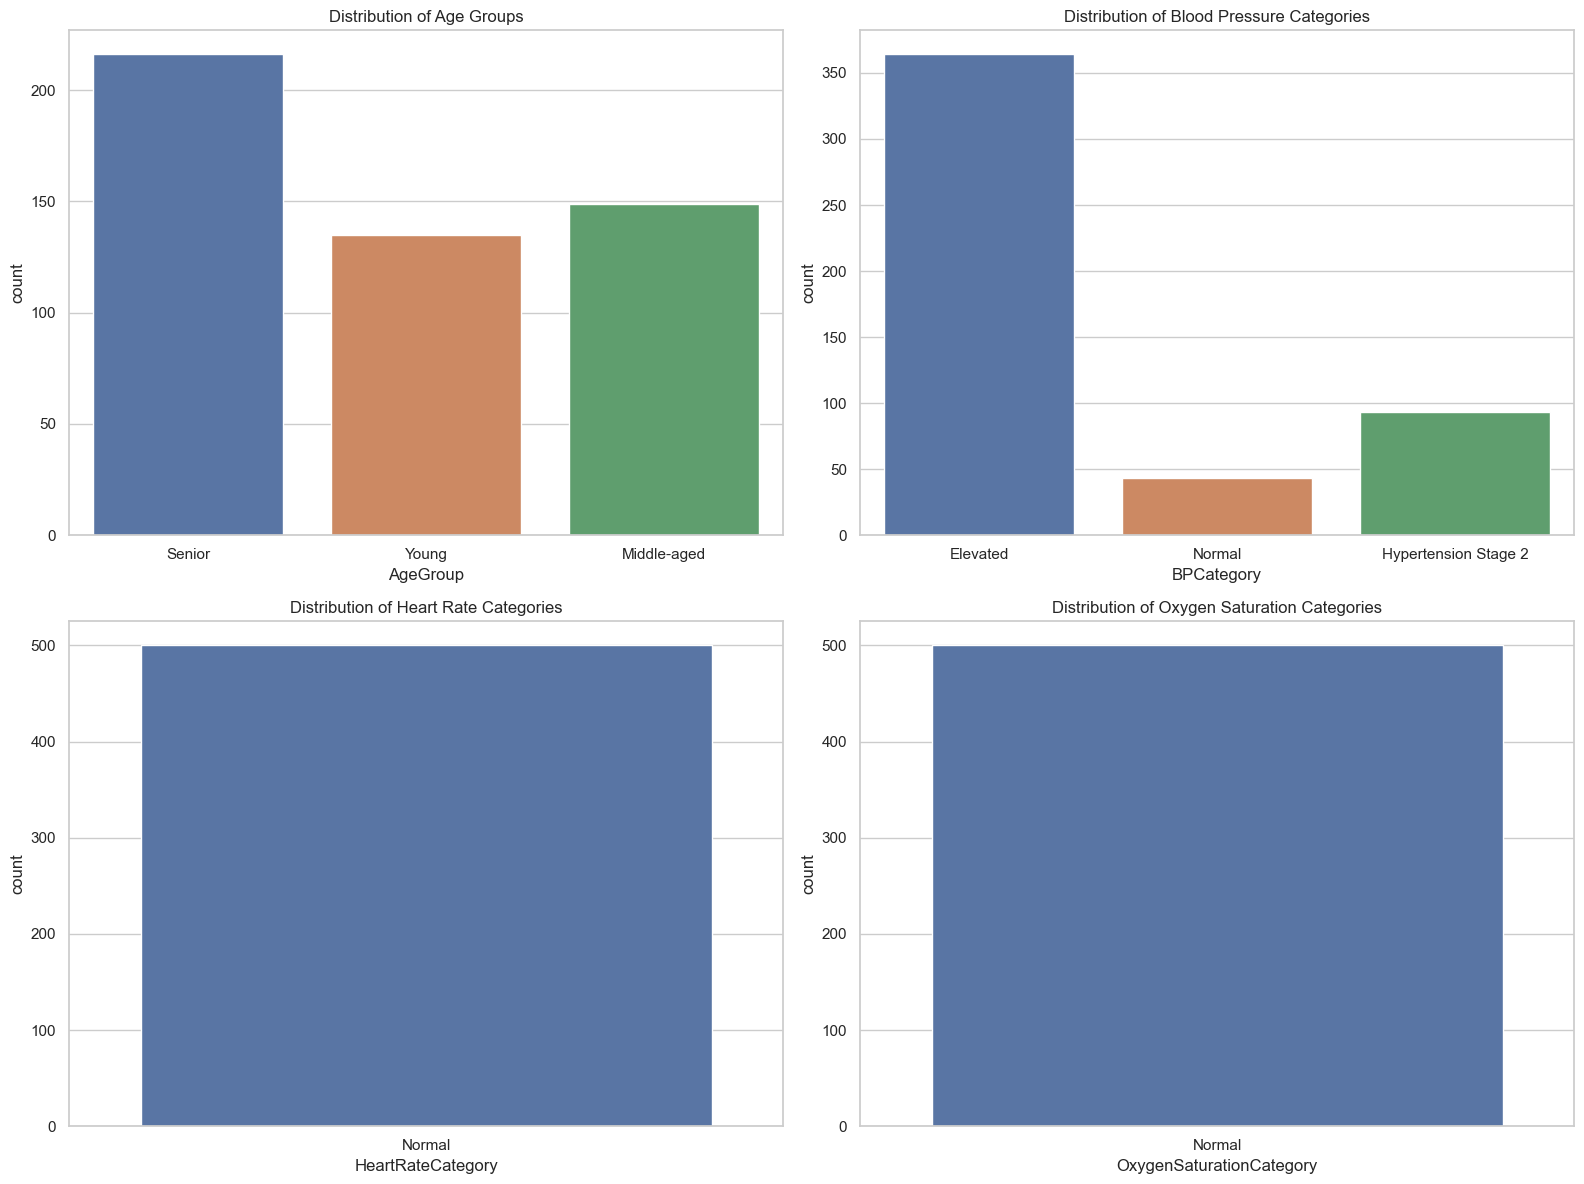

In [51]:
fig, axes = plt.subplots(2,2, figsize=(16,12))

# Age Group count plot
sns.countplot(x='AgeGroup', data=health_data, ax=axes[0,0])
axes[0,0].set_title('Distribution of Age Groups')

# Blood Pressure Categories count plot
sns.countplot(x='BPCategory', data=health_data, ax=axes[0,1])
axes[0,1].set_title('Distribution of Blood Pressure Categories')

# Heart Rate Category count plot
sns.countplot(x='HeartRateCategory', data=health_data, ax=axes[1,0])
axes[1,0].set_title('Distribution of Heart Rate Categories')

# Oxygen Saturation Categories count plot
sns.countplot(x='OxygenSaturationCategory', data=health_data, ax=axes[1,1])
axes[1,1].set_title('Distribution of Oxygen Saturation Categories')

plt.tight_layout()
plt.show()

# Observations

### 1.Distribution of Age Groups: 
##### The count plot shows that the ‘Senior’ category has the highest count of 216, followed by the ‘Middle-aged’ with 149 and ‘Young’ with 135. It suggests that seniors are the largest age group in this dataset.
### 2.Distribution of Blood Pressure Categories: 
##### The majority of the dataset falls under ‘Elevated’ blood pressure with count of 364, with fewer instances in the ‘Hypertension Stage 2’ with count of 93 and ‘Normal’ with 43. This suggests that majority of the patients have ‘Elevated’ blood pressure.
### 3.Distribution of Heart Rate Categories: 
##### All individuals have a ‘Normal’ heart rate, indicates that all individuals in this dataset have a heart rate that falls within the normal range.
### 4.Distribution of Oxygen Saturation Categories: 
##### Everyone has ‘Normal’ oxygen saturation levels. It suggests that oxygen deprivation is not an issue in this group.